In [22]:
import random

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.linear_model import LinearRegression
from datetime import datetime

In [23]:
# dataset
hourly_steps = pd.read_csv('Data/hourlySteps_merged.csv')

# data transformation
temp = pd.to_datetime(hourly_steps['ActivityHour'])
hourly_steps['Date'] = temp.dt.date
hourly_steps['Time'] = temp.dt.time
hourly_steps['intTime'] = hourly_steps.Time.astype(str).str.replace(':', "").astype(int)

In [25]:
# only look between 07:00 and 22:00
filtered = hourly_steps[(hourly_steps.intTime > 69999) & (hourly_steps.intTime < 220001)] # dit kan nog beter
df = pd.DataFrame(filtered.groupby(['Time'])[['StepTotal', 'intTime']].mean())
df['intTime'] = df.intTime.astype(int)

In [26]:
# create df with baseline values as first row
times = [hour for hour in range(df.intTime.values[0], df.intTime.values[-1] + 1, 10000)]
avg_steps = dict() 

for time in times:
    
    avg_steps[df[df.intTime == time].index[0]] = round(df[df.intTime == time].StepTotal.mean())
      
new_df = pd.DataFrame.from_dict(avg_steps, orient = 'index').T

In [27]:
p1 = 5553957443
p2 = 6962181067

In [28]:
pizza = filtered[filtered.Id == p1].groupby(['Date', 'Time']).mean()

for i in range(1, len(pizza), 16):

    new_df.loc[pizza.index[i][0]] = pizza.loc[pizza.index.values[i][0]].StepTotal

new_df = new_df.dropna()

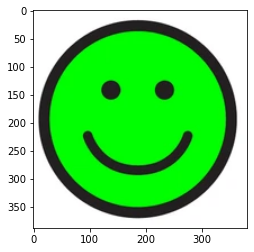

In [29]:
rode_smiley = mpimg.imread('Images/rood.png')
gele_smiley = mpimg.imread('Images/geel.png')
groene_smiley = mpimg.imread('Images/groen.png')

rood = 0.5 * new_df.iloc[:, 0].mean() 
groen = new_df.iloc[:, 0].mean()

# hier kun je random getallen invullen. Alles boven het gemiddelde is groen
steps = 1100

if steps < rood:    
    imgplot = plt.imshow(rode_smiley)
    plt.show()
elif steps > rood and steps < groen:
    imgplot = plt.imshow(gele_smiley)
    plt.show()
else: 
    imgplot = plt.imshow(groene_smiley)
    plt.show()